In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

# Generate product data
def generate_product_data(n_products=100):
  categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Beauty']
  products = pd.DataFrame({
    'product_id': range(1, n_products + 1),
    'category': np.random.choice(categories, size=n_products),
    'price': np.random.uniform(10, 1000, size=n_products).round(2),
    'stock_level': np.random.randint(0, 200, size=n_products)
      })
  return products


# Generate sales data for 6 months

def generate_sales_data(products, start_date='2023-07-01', end_date='2023-12-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    sales_list = []
    for date in dates:
    # Generate more sales for weekends
      n_sales = np.random.randint(50, 100 if date.weekday() >= 5 else 80
      )
      daily_sales = pd.DataFrame({
        'date': [date] * n_sales,
        'product_id': np.random.choice(products['product_id'], size=n_sales),
        'quantity': np.random.randint(1, 5, size=n_sales),
        'discount_applied': np.random.choice([0, 1], size=n_sales, p=[0.7, 0.3])
        })
      sales_list.append(daily_sales)
      sales_df = pd.concat(sales_list, ignore_index=True)


      # Add returned items
      sales_df['returned'] = np.random.choice([0, 1],size=len(sales_df),p=[0.95, 0.05]) # 5% return rate
    return sales_df
                                              

# Generate the datasets
products_df = generate_product_data()
sales_df = generate_sales_data(products_df)
print(products_df.head(10))
print(sales_df.head(10))


   product_id  category   price  stock_level
0           1      Home  915.81           10
1           2    Beauty  851.54          184
2           3     Books  454.96          177
3           4    Beauty  104.46          150
4           5    Beauty  377.11          158
5           6  Clothing  672.15           41
6           7     Books  669.26           98
7           8     Books  595.38            6
8           9     Books  281.97          143
9          10    Beauty  565.63           89
        date  product_id  quantity  discount_applied  returned
0 2023-07-01          37         3                 0         0
1 2023-07-01          24         3                 0         0
2 2023-07-01          93         3                 0         0
3 2023-07-01          46         4                 0         0
4 2023-07-01          53         4                 1         0
5 2023-07-01          95         4                 0         0
6 2023-07-01          99         1                 0         0
7

In [3]:
'''Basic Data Analysis (20 minutes)
Examine and clean both datasets
Calculate basic statistics for prices and sales quantities
Identify any missing values or anomalies'''


print("Missing values in products_df:\n", products_df.isnull().sum())
products_df = products_df.map(lambda x: None if pd.isna(x) else x)
print("\nMissing values in sales_df:\n", sales_df.isnull().sum())
sales_df = sales_df.map(lambda x: None if pd.isna(x) else x)
print("\nDuplicate product IDs:", products_df['product_id'].duplicated().sum())



#Price statistics
price_stats = products_df['price'].describe()
print("\nPrice Statistics:\n", price_stats)

#Sales statistics
quantity_stats = sales_df['quantity'].describe()
print("\nSales Quantity Statistics:\n", quantity_stats)



Missing values in products_df:
 product_id     0
category       0
price          0
stock_level    0
dtype: int64

Missing values in sales_df:
 date                0
product_id          0
quantity            0
discount_applied    0
returned            0
dtype: int64

Duplicate product IDs: 0

Price Statistics:
 count    100.000000
mean     491.102100
std      268.604688
min       10.520000
25%      262.977500
50%      468.785000
75%      698.632500
max      997.760000
Name: price, dtype: float64

Sales Quantity Statistics:
 count    12305.000000
mean         2.497440
std          1.118404
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: quantity, dtype: float64


In [4]:
'''Sales Analysis (40 minutes)
Calculate total revenue per product (consider returns and discounts)
Identify top 10 best-selling products by:
Revenue
Quantity sold
Return rate
Analyze sales patterns:
Daily sales trends
Weekend vs. weekday performance
Monthly trends'''


#Merging both sales and product dataframes
sales_with_price = pd.merge(sales_df, products_df[['product_id', 'price']], on='product_id')
print("\nSales with Prices:\n", sales_with_price.head())


sales_with_price['revenue'] = sales_with_price['price'] * sales_with_price['quantity'] * (1 - sales_with_price['discount_applied'])

product_revenue = sales_with_price.groupby('product_id')['revenue'].sum()
product_revenue = product_revenue - sales_with_price[sales_with_price['returned'] == 1].groupby('product_id')['revenue'].sum()

print("\nTotal Revenue per Product:\n", product_revenue)

#Top 10 Products

#Revenue
top_10_revenue = product_revenue.sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n", top_10_revenue)

#Quantity Sold
top_10_quantity = sales_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10) 
print("\nTop 10 Products by Quantity Sold:\n", top_10_quantity)

#Return Rate
product_returns = sales_df.groupby('product_id')['returned'].sum()
product_sales_count = sales_df.groupby('product_id')['product_id'].count()
return_rate = (product_returns / product_sales_count) * 100
top_10_return_rate = return_rate.sort_values(ascending=False).head(10)
print("\nTop 10 Products by Return Rate:\n", top_10_return_rate)


#Sales Trends


#Daily

daily_sales = sales_df.groupby('date')['quantity'].sum()
print("\nDaily Sales Trends:\n", daily_sales)

#Weekend vs Weekday 

sales_df['day_of_week'] = sales_df['date'].dt.dayofweek
weekend_sales = sales_df[sales_df['day_of_week'] >= 5]['quantity'].sum()
weekday_sales = sales_df[sales_df['day_of_week'] < 5]['quantity'].sum()
print("\nWeekend Sales:", weekend_sales)
print("Weekday Sales:", weekday_sales)

#Monthly

sales_df['month'] = sales_df['date'].dt.month
monthly_sales = sales_df.groupby('month')['quantity'].sum()
print("\nMonthly Sales Trends:\n", monthly_sales)












Sales with Prices:
         date  product_id  quantity  discount_applied  returned   price
0 2023-07-01          37         3                 0         0  461.97
1 2023-07-01          24         3                 0         0  567.64
2 2023-07-01          93         3                 0         0  714.04
3 2023-07-01          46         4                 0         0  651.21
4 2023-07-01          53         4                 1         0  695.51

Total Revenue per Product:
 product_id
1      180414.57
2      158386.44
3       88262.24
4       18489.42
5       88620.85
         ...    
96      16517.97
97     198576.32
98      87177.60
99     123849.09
100    206475.18
Name: revenue, Length: 100, dtype: float64

Top 10 Products by Revenue:
 product_id
68     211976.45
100    206475.18
40     200770.15
97     198576.32
22     193710.96
83     192783.64
63     185325.10
1      180414.57
25     179529.92
30     176421.41
Name: revenue, dtype: float64

Top 10 Products by Quantity Sold:
 produc


Total Revenue by Category:
 category
Beauty         2407518.68
Books          1713335.77
Clothing       2117353.73
Electronics    1929102.55
Home           2277943.33
Name: revenue, dtype: float64

Average Order Size by Category:
 category
Beauty         2.524416
Books          2.466969
Clothing       2.506599
Electronics    2.501289
Home           2.485798
Name: quantity, dtype: float64

Return Rates by Category:
 category
Beauty         5.435244
Books          4.891578
Clothing       5.007764
Electronics    5.541237
Home           4.635978
dtype: float64

Discount Impact by Category :
 category
Beauty         30.276008
Books          31.114473
Clothing       30.357143
Electronics    30.670103
Home           30.786810
Name: discount_applied, dtype: float64


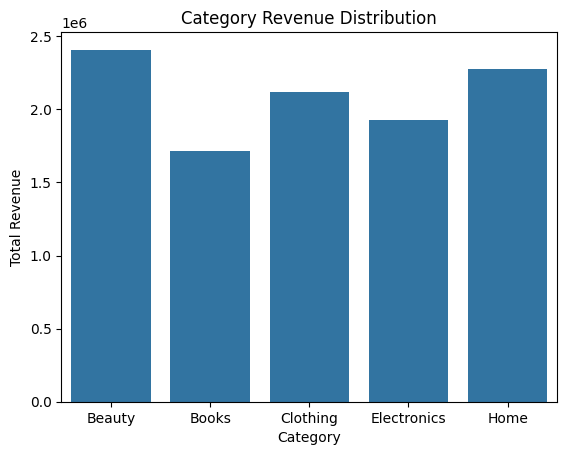

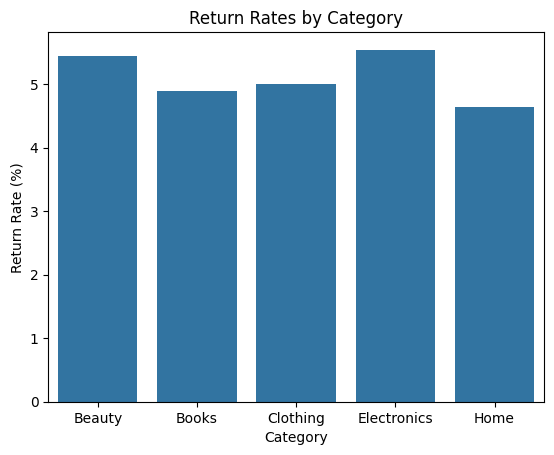

In [23]:
'''Category Performance (30 minutes)

Analyze performance by category:
Total revenue
Average order size
Return rates
Discount impact

Create visualizations to show:
Category revenue distribution
Category sales trends over time
Return rates by category'''


import matplotlib.pyplot as plt
import seaborn as sns

sales_with_price = pd.merge(sales_df, products_df[['product_id', 'price', 'category']], on='product_id')
sales_with_price['revenue'] = sales_with_price['price'] * sales_with_price['quantity'] * (1 - sales_with_price['discount_applied'])

#Performance by Category

#Total Revenue
category_revenue = sales_with_price.groupby('category')['revenue'].sum()
print("\nTotal Revenue by Category:\n", category_revenue)

#Average Order Size
category_order_size = sales_with_price.groupby('category')['quantity'].mean()
print("\nAverage Order Size by Category:\n", category_order_size)

#Return Rates 
category_returns = sales_with_price.groupby('category')['returned'].sum()
category_sales_count = sales_with_price.groupby('category')['product_id'].count()
category_return_rate = (category_returns / category_sales_count) * 100
print("\nReturn Rates by Category:\n", category_return_rate)

#Discount Impact
category_discount_impact = sales_with_price.groupby('category')['discount_applied'].mean() * 100
print("\nDiscount Impact by Category :\n", category_discount_impact)

# Plotting

#Category Revenue Distribution

sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Category Revenue Distribution')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

#Return Rates by Category

sns.barplot(x=category_return_rate.index, y=category_return_rate.values)
plt.title('Return Rates by Category')
plt.xlabel('Category')
plt.ylabel('Return Rate (%)')
plt.show()

In [27]:
'''Calculate inventory turnover rate
Identify products that might need restocking
Flag slow-moving products
Recommend optimal stock levels based on sales patterns'''


#Inventory Turnover Rate

total_quantity_sold = sales_df['quantity'].sum()
average_inventory = products_df['stock_level'].mean()
inventory_turnover_rate = total_quantity_sold / average_inventory
print("\nInventory Turnover Rate:", inventory_turnover_rate)

#Identify Products Needing Restocking

products_needing_restocking = products_df[products_df['stock_level'] <= 10]
print("\nProducts Needing Restocking:\n", products_needing_restocking)

#Flag Slow-Moving Products

sales_by_product = sales_df.groupby('product_id')['quantity'].sum()
slow_moving_products = sales_by_product[sales_by_product <= 100].index
print("\nSlow-Moving Products:\n", slow_moving_products)

#Recommend Optimal Stock Levels

avg_sales_by_product = sales_df.groupby('product_id')['quantity'].mean()
recommended_levels = (avg_sales_by_product * 2).astype(int)
print("\nRecommended Stock Levels:\n", recommended_levels)




Inventory Turnover Rate: 293.62698261035735

Products Needing Restocking:
     product_id     category   price  stock_level
0            1         Home  915.81           10
7            8        Books  595.38            6
13          14     Clothing  724.51            1
20          21     Clothing  209.70            8
76          77  Electronics  596.77            7
89          90        Books  859.78            3
98          99     Clothing  522.57            5

Slow-Moving Products:
 Index([], dtype='int64', name='product_id')

Recommended Stock Levels:
 product_id
1      5
2      4
3      5
4      4
5      5
      ..
96     4
97     4
98     5
99     5
100    4
Name: quantity, Length: 100, dtype: int64
